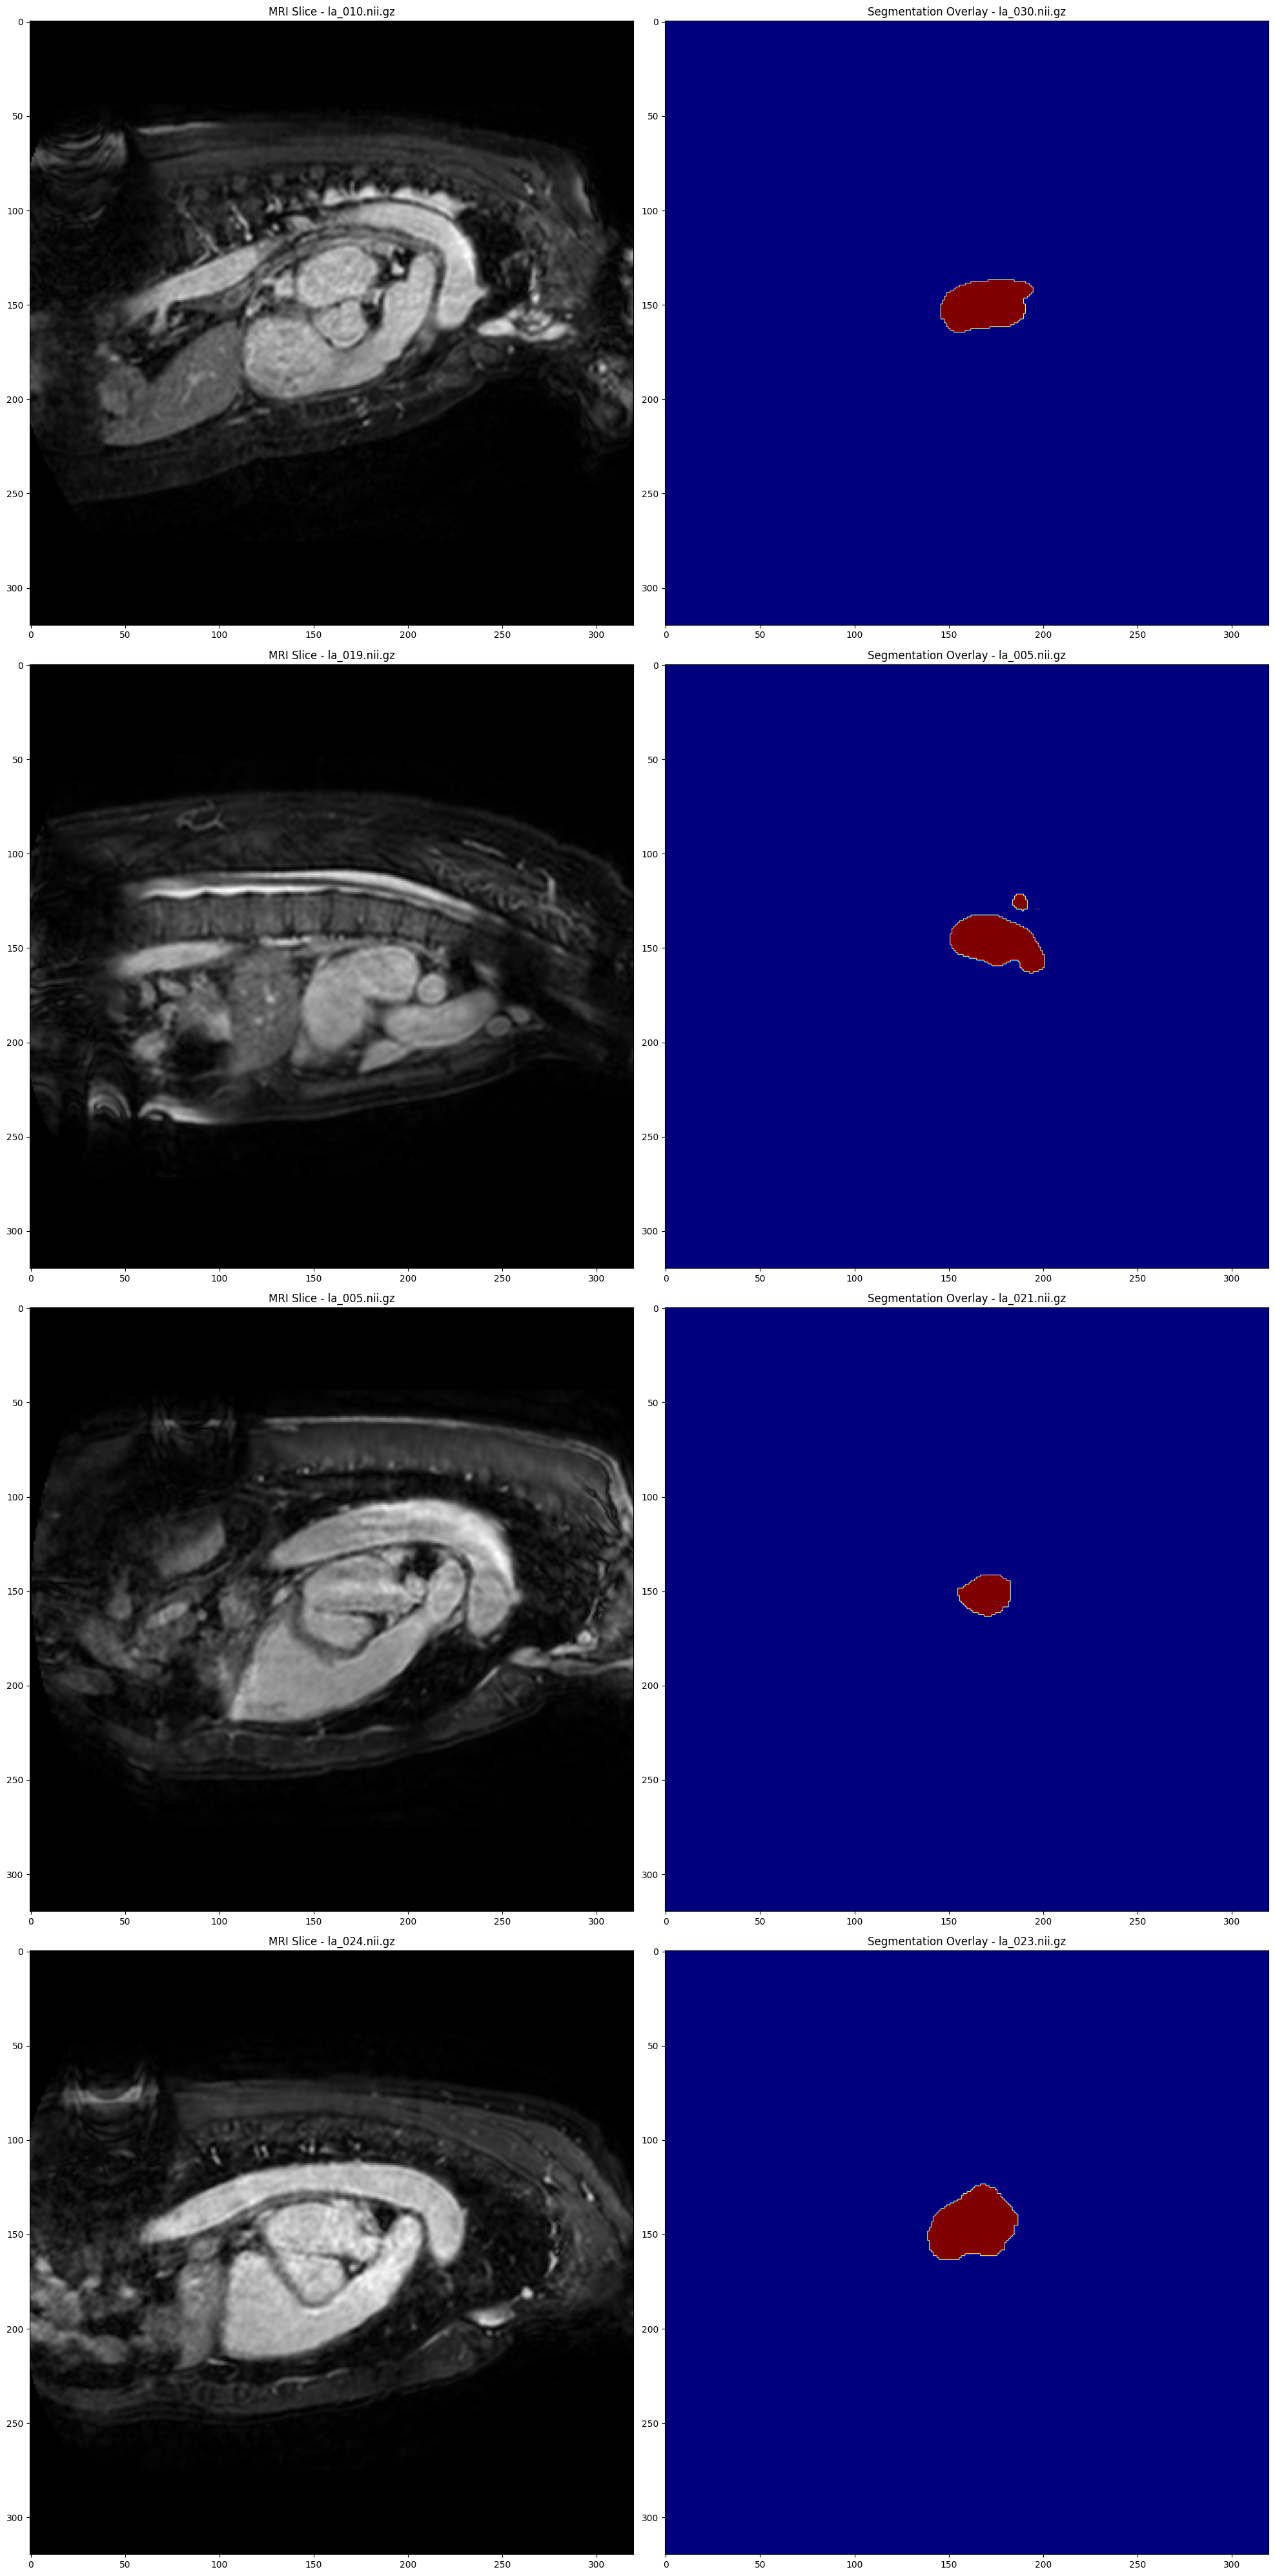

In [20]:
import os
import random
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Replace these with the actual paths to your images and labels directories
train_data_path = 'Task02_Heart/Task02_Heart/imagesTr'
train_label_path = 'Task02_Heart/Task02_Heart/labelsTr'

# Function to list NIfTI files while excluding system files
def list_nii_files(directory):
    return [f for f in os.listdir(directory) if (f.endswith('.nii') or f.endswith('.nii.gz')) and not f.startswith('._')]

# List NIfTI image and label files
train_data_files = list_nii_files(train_data_path)
train_label_files = list_nii_files(train_label_path)

# Select random 4 NIfTI image and label files
selected_image_files = random.sample(train_data_files, 4)
selected_label_files = random.sample(train_label_files, 4)

# Create a figure with subplots
fig, axs = plt.subplots(4, 2, figsize=(20, 40)) # Adjust the size as needed

for i, (image_file, label_file) in enumerate(zip(selected_image_files, selected_label_files)):
    # Construct the full file paths
    image_path = os.path.join(train_data_path, image_file)
    label_path = os.path.join(train_label_path, label_file)
    
    # Load the NIfTI files using nibabel
    mri_image = nib.load(image_path).get_fdata()
    segmentation_mask = nib.load(label_path).get_fdata()
    
    # Find the dimension with the lowest resolution
    lowest_res_dim = np.argmin(mri_image.shape)

    # Calculate the middle slice number of that dimension
    middle_slice_num = mri_image.shape[lowest_res_dim] // 2

    # Extract the middle slice from the MRI and segmentation mask
    mri_slice = np.take(mri_image, middle_slice_num, axis=lowest_res_dim)
    seg_slice = np.take(segmentation_mask, middle_slice_num, axis=lowest_res_dim)

    # Display MRI and overlay segmentation
    axs[i, 0].imshow(mri_slice, cmap='gray')
    axs[i, 0].set_title(f'MRI Slice - {image_file}')
    axs[i, 0].axis('on')  

    axs[i, 1].imshow(seg_slice, cmap='jet')  # Only display segmented image
    axs[i, 1].set_title(f'Segmentation Overlay - {label_file}')
    axs[i, 1].axis('on') 

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
